# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [1]:
import numpy as np
from numpy import array
from diffusionpy import Diffusion_MS,D_Matrix,Diffusion_MS_iter,vpure,dlnai_dlnxi,lngi
import matplotlib.pyplot as plt

experimental data

In [2]:
texp=array([5,15,30,60,90,120,150,180,210,240,270,300])
wL1D03=array([[5.1687E-06,	3.42274E-07, 9.99994489e-01],
        [8.11419000e-06, 6.63373000e-07, 9.99991222e-01],
       [1.16988000e-05, 1.30293000e-06, 9.99986998e-01],
       [1.82872000e-05, 2.61848000e-06, 9.99979094e-01],
       [2.43481000e-05, 4.06235000e-06, 9.99971590e-01],
       [2.97692000e-05, 5.50577000e-06, 9.99964725e-01],
       [3.50846000e-05, 7.11082000e-06, 9.99957805e-01],
       [3.91787000e-05, 8.82865000e-06, 9.99951993e-01],
       [4.30863000e-05, 1.03757000e-05, 9.99946538e-01],
       [4.68326000e-05, 1.22831000e-05, 9.99940884e-01],
       [4.92799000e-05, 1.34226000e-05, 9.99937297e-01],
       [5.08487000e-05, 1.48856000e-05, 9.99934266e-01]])

# wL1D03=array([[2.47540000e-06, 3.38334000e-07, 9.99997186e-01],
#        [5.76787000e-06, 7.27514000e-07, 9.99993505e-01],
#        [9.85161000e-06, 1.13529000e-06, 9.99989013e-01],
#        [1.43790000e-05, 2.29403000e-06, 9.99983327e-01],
#        [1.61947000e-05, 3.20807000e-06, 9.99980597e-01],
#        [1.67283000e-05, 4.11030000e-06, 9.99979161e-01],
#        [1.71512000e-05, 4.97144000e-06, 9.99977877e-01],
#        [1.73003000e-05, 5.76267000e-06, 9.99976937e-01],
#        [1.73463000e-05, 6.66612000e-06, 9.99975988e-01],
#        [1.71751000e-05, 7.58597000e-06, 9.99975239e-01],
#        [1.73692000e-05, 8.33222000e-06, 9.99974299e-01],
#        [1.75724000e-05, 9.19885000e-06, 9.99973229e-01]])

msol=500000
m0=array([43.491,18.639,0])
ww0=0.01
dl0=0.3
dl8=0.3
wi0=np.asarray([(1-dl0)*(1-ww0),dl0*(1-ww0),ww0])
# release=wL1D03*msol/m0
# notreleased=1-release
# wexp=notreleased*wi0
# wexp[:,2]=1-wexp[:,0]-wexp[:,1]

wexp=wL1D03



We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=0.0001
ww8=0.9
wi8=np.asarray([dl8*(1-ww8),(1-dl8)*(1-ww8),ww8])
Mi=np.asarray([65000,357.57,18.015])
T=298.15
p=1E5

kij=D_Matrix(np.asarray([-0.0621,-0.156,-0.025]),nc)
par={"mi":np.asarray([2420.99, 14.283,1.20469]),
"si": np.asarray([2.947, 3.535,2.797059952]),
"ui" :np.asarray([205.27, 262.79,353.95]),
"eAi" :np.asarray([0., 886.4,2425.67]),
"kAi":np.asarray([0.02, 0.02,0.04509]),
"NAi":np.asarray([653., 3.,1.]),
"Mi": Mi,
"kij":kij}

vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi :lngi(T,wi,**par)
dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi(T,wi,**par)

For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [4]:
Dvec=np.asarray([1E-13,1E-13,2E-13])
# Dvec=np.asarray([1E-13,1E-13,1E-13])

Next we define the time array and which component is mobile

In [5]:
nt=300
t=np.linspace(0,300,nt)*60
mobile=np.asarray([True,True,False])
# mobile=np.asarray([False,False,True])

In [6]:
wtid=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True)
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True,nz=20)
# wt=Diffusion_MS_iter(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun)
notreleased=wt/wi0
release=1-notreleased
wt=m0/msol*release
wt[:,2]=1-wt[:,0]-wt[:,1]
wtid=wt

------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1239888 seconds ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.1468352 seconds ----------------


We can determine the mass dissolved in the dissolution medium by quantifying the mass that leaves the ASD. The initial mass of the ASD and the mass of the dissolution medium must be known

We plot the results

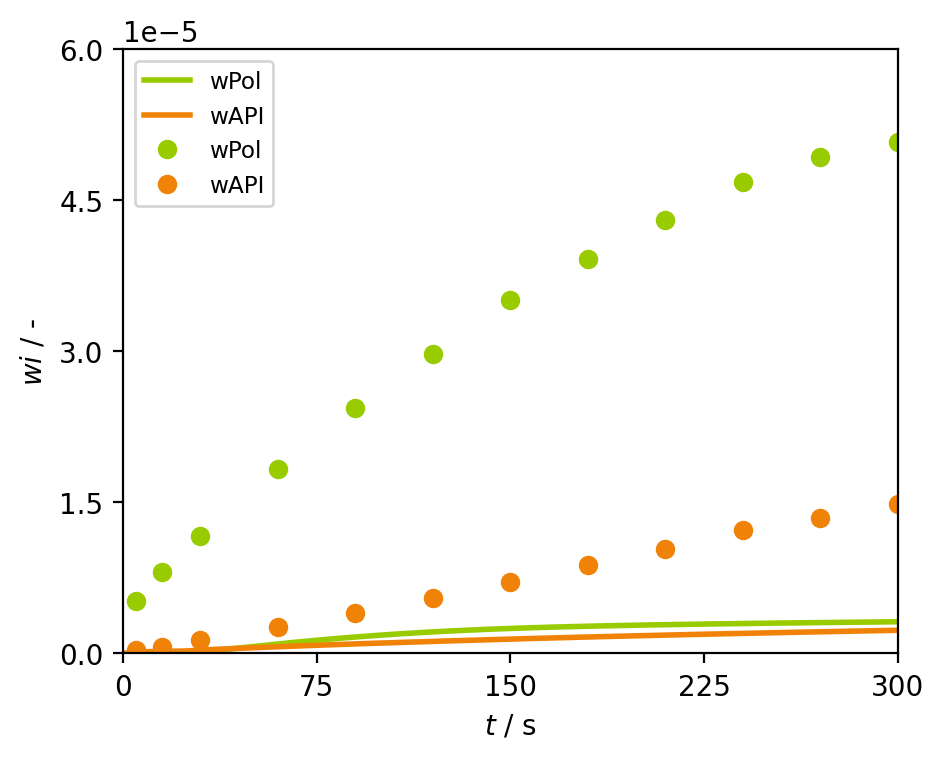

In [7]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# ax.plot(t/60,wtid[:,0], "--",color = color1 , 
#         linewidth = 2.0, label = "wPol")
# ax.plot(t/60,wtid[:,1], "--",color = color2 , 
#         linewidth = 2.0, label = "wAPI")

ax.plot(t/60,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "wPol")
ax.plot(t/60,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wAPI")

ax.plot(texp,wexp[:,0], "ro",color = color1 , 
        linewidth = 2.0, label = "wPol")
ax.plot(texp,wexp[:,1], "go",color = color2 , 
        linewidth = 2.0, label = "wAPI")



ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 6E-5])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()



# ax2.plot(zexp2*Lt[0],tolu, "o")


[[<matplotlib.lines.Line2D at 0x19f020c3f40>],

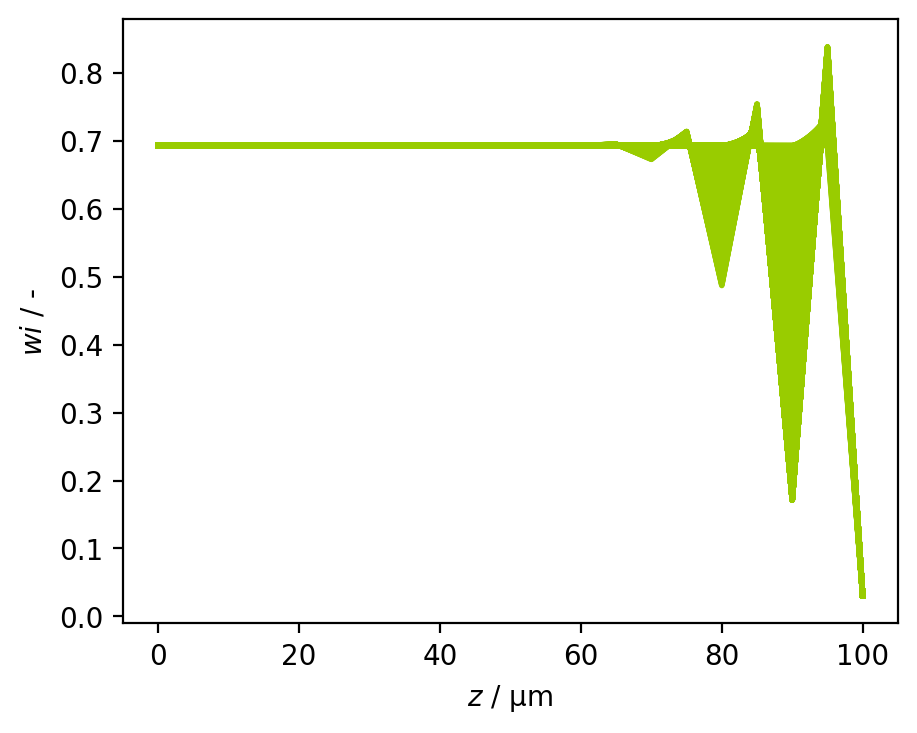

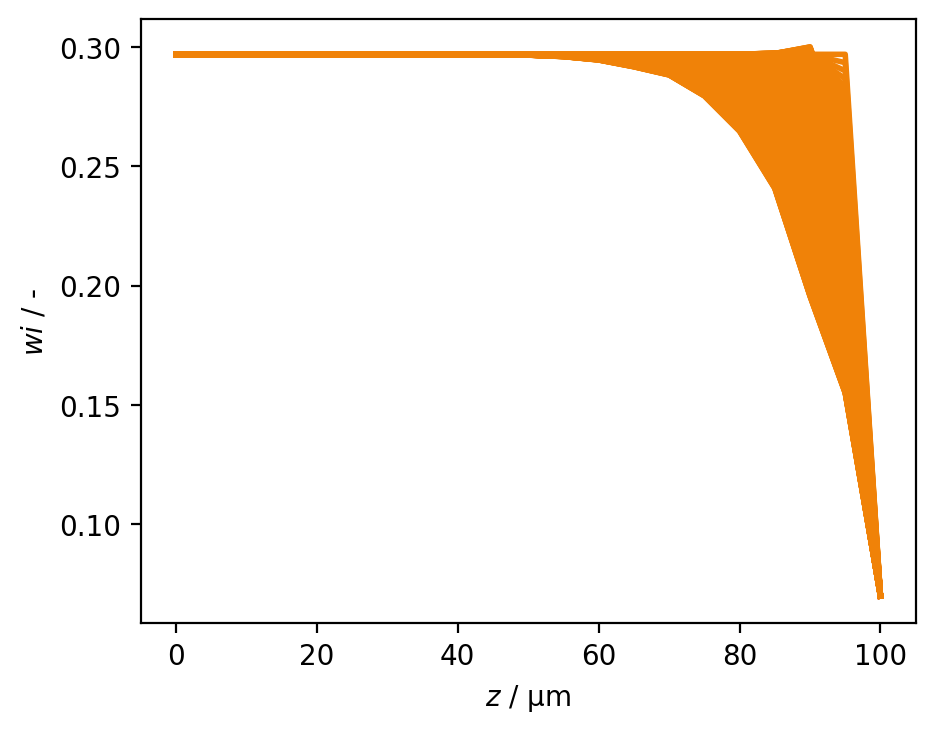

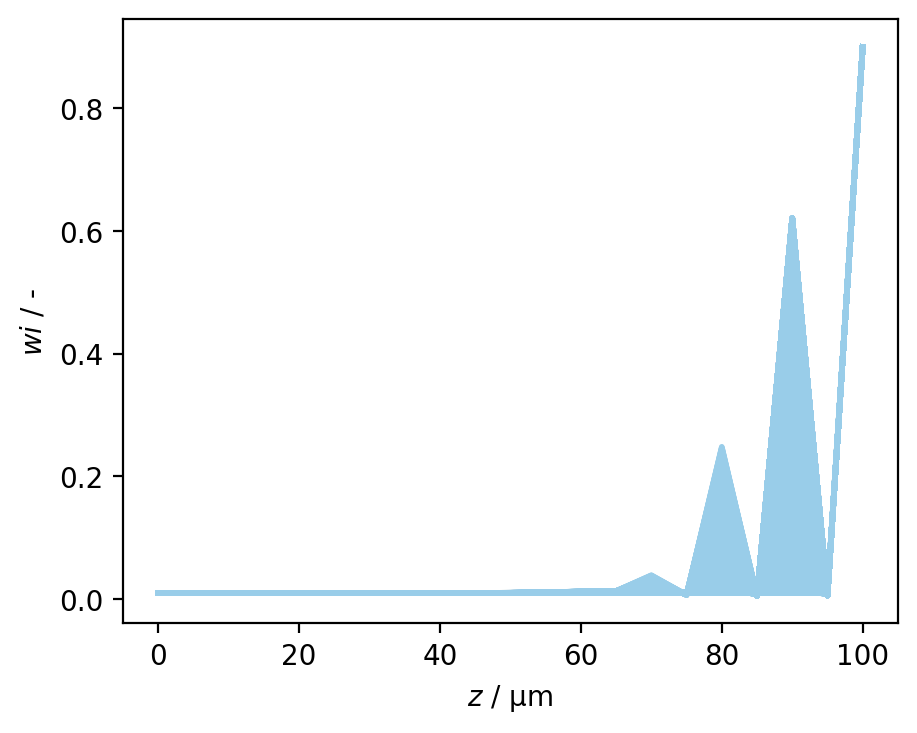

In [8]:
color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig1, ax1 = plt.subplots(figsize=(5, 4), dpi = 200)
fig2, ax2 = plt.subplots(figsize=(5, 4), dpi = 200)
fig3, ax3 = plt.subplots(figsize=(5, 4), dpi = 200)
fig1.subplots_adjust(hspace=0.5, wspace=0.3)
fig2.subplots_adjust(hspace=0.5, wspace=0.3)
fig3.subplots_adjust(hspace=0.5, wspace=0.3)
ax1.set_xlabel('$z$ / µm')
ax1.set_ylabel('$wi$ / -')
ax2.set_xlabel('$z$ / µm')
ax2.set_ylabel('$wi$ / -')
ax3.set_xlabel('$z$ / µm')
ax3.set_ylabel('$wi$ / -')
[ax1.plot(zvec*1E6,wtz[i,0,:], "-",color = color1 , linewidth = 2.0) for i,val in enumerate(wtz[:,0,0])]
# ax1.plot(zexp1*Lt[0],meth, "o")

[ax2.plot(zvec*1E6,wtz[i,1,:], "-",color = color2 , linewidth = 2.0) for i,val in enumerate(wtz[:,0,0])]

[ax3.plot(zvec*1E6,wtz[i,2,:], "-",color = color3 , linewidth = 2.0) for i,val in enumerate(wtz[:,0,0])]